<a href="https://colab.research.google.com/github/Joshua-Woodard/NLP_in_TensorFlow/blob/main/NLP_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP Fundamentals in TensorFlow

NLP has the goal of deriving information out of natural language (could be sequences, text, or speech)

Another common term for NLP problems is sequence to sequence problems (seq2seq)


## Check for GPU

In [ ]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-b009e847-8976-5aac-6a40-923eff990a06)


## Get Helper functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2022-06-24 15:35:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-06-24 15:35:33 (72.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get a text dataset

The dataset we're going to be using is Kaggle's introduction to NLP dataset (text samples of Tweets labelled as disaster or not disaster).

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# Unzip data
unzip_data("nlp_getting_started.zip")

--2022-06-24 15:35:38--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.18.128, 142.250.145.128, 74.125.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.18.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2022-06-24 15:35:39 (96.9 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing a text dataset

To visualize our text samples, we first ahve to read them in, one way to do so would be to use python...

But I prefer to get visual straight away. So another way to do this is to use pandas!

In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df["text"][1]

'Forest fire near La Ronge Sask. Canada'

In [ ]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [ ]:
# What does the test dataframe look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# How many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
# Let's visualize some random training examples!
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not real disaster)
Text:
FedEx no longer shipping bioterror germs - WXIA-TV | @scoopit http://t.co/ZQqJrQsbJm

---

Target: 1 (real disaster)
Text:
Philippines Must Protect Internally Displaced Persons Warns UN Expert http://t.co/xLZWTzgQTC

---

Target: 1 (real disaster)
Text:
'Food crematoria' provoke outrage amid crisis famine memories... http://t.co/fABVlvN5MS

---

Target: 0 (not real disaster)
Text:
#iphone #twist Ultimate #preparedness library: http://t.co/ksgmY0D0Mx Prepare Yourself For Any Catastrophe. Ov http://t.co/MZK0PFogI7

---

Target: 0 (not real disaster)
Text:
today will be another dualcom with @Im_Razed !!! if you enjoyed yesterdays check out todays at 5 pm easter!!!

---



## Split data intro training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, #use 10% of training data for validation split
                                                                            random_state=42)

In [ ]:
# Check the lengths of each of the datasets
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
# Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## Converting text into numbers

When dealing with a text problem, one of the first things you have to do before you can build a model, is to convert the text into numbers.

A few ways to do this:
* Tokenization: direct mapping of token (a token could be a word or a character) to a number
* Embedding: create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be trained)

### Text Vectorization (tokenization)

In [ ]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (automatically add <OOV> (<OOV> is for words that dont fit in the limit, will choose most common if limited))
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None, # Create groups of n-words eg if 2 will group words into sets of 2
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None, # how long do you want your sequences to be? none will set to longest in data
                                    pad_to_max_tokens=False)

In [ ]:
# Find the average number of tokens (worse) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
# Set up text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
# Fit the text vectorizer to the train data
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
        \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
 Photos: 17 people killed and over 25 injured in deadly Saudi Mosque suicide attack http://t.co/geEKnwJJSz        

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 729, 1234,   57,  111,    7,   60,  867,  243,    4, 1690,  312,
         393,   87,  113,    1]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all of the unique words in our training data
top_5_words = words_in_vocab[:5] # get the most common words
bottom_5_words = words_in_vocab[-5:] # get the least common words
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating an Embedding using an Embedding Layer

To make our embedding, we're going to use TensorFlow's embedding layer: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

The parameters we care most about for our embedding layer:
* `input_dim` = the size of our vocabulary
* `output_dim` = the size of the output embedding vector, e.g. a value of 100 would mean each token gets represented by a vector 100 long
* `input_length` = length of the sequences being passed to the embedding layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # output shape
                             input_length=max_length # how long is each unit
                             )
embedding

In [ ]:
# get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
        \n\nEmbedded version:")

# Embed the random sentence (turn it into dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 There is a #baby in Oliver's #swim class that cries the ENTIRE class. It's like his #parents are #waterboarding him or dipping him in #lava        

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 2.4242029e-03,  4.2445585e-04, -3.0545248e-02, ...,
         -4.2897690e-02,  1.8689420e-02, -3.0236566e-02],
        [ 3.3995632e-02, -6.4764619e-03, -2.6701523e-02, ...,
         -2.0336360e-05, -2.5527155e-02, -2.1589233e-02],
        [-2.5783479e-02,  2.5334489e-02, -8.6296089e-03, ...,
          1.1396430e-02, -1.1350252e-02, -8.7248795e-03],
        ...,
        [-4.6808433e-02,  2.9554609e-02, -6.1096661e-03, ...,
          4.5683626e-02,  4.4675682e-02, -3.0206298e-02],
        [ 4.8678663e-02, -3.2614984e-02, -4.9723014e-03, ...,
         -1.6832240e-03, -2.3350656e-02, -4.1698851e-02],
        [-8.3493963e-03,  2.0347562e-02, -2.9020870e-02, ...,
         -4.1300725e-02,  2.4581779e-02,  4.6576332e-02]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 2.42420286e-03,  4.24455851e-04, -3.05452477e-02,  3.06218974e-02,
        -1.91822294e-02, -1.39638186e-02, -1.76951289e-02, -1.80686340e-02,
        -4.74484824e-02,  4.06212471e-02, -7.48245791e-03,  1.01875439e-02,
         3.95229347e-02, -4.05158289e-02, -5.07725403e-03, -1.09616406e-02,
         3.98134850e-02, -3.11573278e-02, -3.35253030e-02,  3.09642404e-03,
        -2.65224706e-02, -1.41280517e-02,  2.17298381e-02,  1.52995624e-02,
        -1.24185570e-02, -2.94861943e-03, -1.27331614e-02, -4.85998392e-03,
        -1.11959465e-02, -5.50936908e-04,  4.89927568e-02, -4.91414666e-02,
        -4.13827896e-02,  4.88237403e-02, -4.20272350e-04, -3.26571353e-02,
         4.03267257e-02,  1.51872672e-02, -4.98561151e-02, -4.63986285e-02,
        -3.30856666e-02, -8.93063471e-03, -3.08897384e-02,  2.54249014e-02,
        -2.29052436e-02, -3.18933278e-02,  2.97009833e-02, -8.42612982e-03,
         4.98487465e-02, -1.45701058e-0

## Modeling a text dataset (running a series of experiments)

Now we've got a way to turn our text sequences into numbers, it's time tos tart building a series of modeling experiments.

We'll start with a baseline and move on from there.

* Model 0: Naive bayes (baseline), this is from the Sklearn ML map
* Model 1: Feed-Forward neural network (dense model)
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectional-LSTM model (RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: TensorFlow Hub Pretrained Feature Extractor (using transfer learning for NLP)
* Model 7: Same as model 6 with 10% of training data

How are we going to approach all of these?

Use the standard steps in modeling with tensorflow:

1. Create a model
2. Build a model
3. Fit a model
4. Evaluate a model

### Model 0: Naive Bayes (baseline)

As with all machine learning modeling experiments, it's important to create a baseline model to have something to compare future experiments to.

For the baseline, wel'll be using Sklearn's Multinominal Naive Bayes using the TF-IDF formula to convert our words to numbers.

**NOTE** ❗ It's common practice to use Non-Deep learning algorithms as a baseline because of their speed and then later using DL so you can improve upon them.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modeling pipeline
model_0 = Pipeline([
                    ("tfdif", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfdif', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Creating an evaluation function for our model experiments

We could evaluate our model's predictions with different metrics every time, however this will be cumbersome and could easily be fixed by a function!

Let's create one to compare our model's predictions with the truth labels using the following metrics:
* Accuracy
* Precision
* Recall
* F1-Score
* Confusion Matrix

In [ ]:
# Function to evaluate accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_preds):
  """
  Calculates model accuracy, precision, recall, and f1 score of a binary classification model.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_preds) * 100
  #Calcualte model precision, recall, and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_preds, average="weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1-score": model_f1}
  return model_results

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_preds = baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'f1-score': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

## Model 1: A simple dense model



In [ ]:
# create a tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create a directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
# Build a model with Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string) # intputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numberized inputs
x = layers.GlobalAveragePooling1D()(x) # condense feature vector for each token to one vector
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit model
model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20220624-153547
Epoch 1/5
215/215 [==============================] - 7s 6ms/step - loss: 0.6123 - accuracy: 0.6936 - val_loss: 0.5375 - val_accuracy: 0.7520
Epoch 2/5
215/215 [==============================] - 1s 4ms/step - loss: 0.4421 - accuracy: 0.8183 - val_loss: 0.4741 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3466 - accuracy: 0.8593 - val_loss: 0.4570 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 1s 4ms/step - loss: 0.2834 - accuracy: 0.8894 - val_loss: 0.4650 - val_accuracy: 0.7900
Epoch 5/5
215/215 [==============================] - 1s 4ms/step - loss: 0.2366 - accuracy: 0.9114 - val_loss: 0.4844 - val_accuracy: 0.7874


In [ ]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4844 - accuracy: 0.7874


[0.48437899351119995, 0.787401556968689]

In [ ]:
model_1_pred_probs = model_1.predict(val_sentences)

In [ ]:
model_1_pred_probs.shape

(762, 1)

In [ ]:
# Convert model prediction probs to label format (yes or no... 1 or 0)
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [ ]:
# Calculate our model_1 results
model_1_results = calculate_results(y_true=val_labels,
                                    y_preds=model_1_preds)
model_1_results

{'accuracy': 78.74015748031496,
 'f1-score': 0.7838012115396069,
 'precision': 0.7942180127180873,
 'recall': 0.7874015748031497}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1-score': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [ ]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

## Visualizing learned embeddings

In [ ]:
# Get the vocabulary from the text vectorization
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
max_vocab_length

10000

In [ ]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Get the weight matrix of embedding layer
# These are the numerical representations of each token in our training data, which have been learned for ~5 epochs
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights

array([[-0.06846443,  0.01030842,  0.01673281, ...,  0.01875186,
        -0.07124555, -0.07267417],
       [-0.01078184, -0.01234162,  0.00813973, ..., -0.01517202,
        -0.00401666,  0.02626739],
       [ 0.03147899, -0.01927038,  0.00773417, ..., -0.02151605,
        -0.04775897, -0.04417009],
       ...,
       [-0.01091765, -0.01688955,  0.01690936, ...,  0.00772132,
         0.01173061, -0.00371655],
       [-0.02373649, -0.060759  , -0.04218213, ..., -0.00921507,
        -0.03802836,  0.0141279 ],
       [-0.03398573, -0.06367096, -0.05182542, ..., -0.09468275,
        -0.09134806, -0.03527192]], dtype=float32)

In [ ]:
print(embed_weights.shape)

(10000, 128)


### Now we've got the embedding matrix our model has learned ot represent our tokens, let's see how we can visualize it.

To do so, tensorflow has a handy tool called projector!

http://www.projector.tensorflow.org

And a great guide on word embeddings! 

https://www.tensorflow.org/text/guide/word_embeddings

In [ ]:
# Create embedding files (got this from the word embeddings documentation linked above)
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download files from Colab to upload to projector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural Networks (RNN's)

RNN's are useful for sequence data.

The premise of a recurrent neural network is to use the representation of a previous input to aid the representation of a later input.

📚 *RESOURCES* - If you want an overview of the internals of a recurrent neural network, see the following:
- https://www.youtube.com/watch?v=7sB052Pz0sQ&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI (MIT's sequence modeling lecture)
- https://colah.github.io/posts/2015-08-Understanding-LSTMs/ (Chris Olah's intro to LSTMs
- http://karpathy.github.io/2015/05/21/rnn-effectiveness/ (Andrej Karpathy's the unreasonable effectiveness of RNN's)

### Model 2: LSTM

LSTM = long short term memory ( one of the  most popular LSTM cells)

Our structure of an RNN typically looks like this:

```
Input (text) -> Tokenize -> Embedding -> Layers (RNNs/Dense) - > Output (label probability
```

In [ ]:
# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
# x = layers.LSTM(units=64, return_sequences=True)(x) # when you're stacking RNN cells together, you need to set return_sequences=True
# print(x.shape)
x = layers.LSTM(64)(x)
# print(x.shape)
# x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [ ]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20220624-153601
Epoch 1/5
215/215 [==============================] - 5s 7ms/step - loss: 0.2223 - accuracy: 0.9215 - val_loss: 0.5299 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1558 - accuracy: 0.9428 - val_loss: 0.6641 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1287 - accuracy: 0.9510 - val_loss: 0.6483 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1027 - accuracy: 0.9612 - val_loss: 0.7823 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0815 - accuracy: 0.9666 - val_loss: 0.9266 - val_accuracy: 0.7782


In [ ]:
# Make predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[3.85880051e-03],
       [8.64903092e-01],
       [9.99845743e-01],
       [1.15987554e-01],
       [4.00778576e-04],
       [9.99509931e-01],
       [8.89091611e-01],
       [9.99892116e-01],
       [9.99846339e-01],
       [6.96384311e-01]], dtype=float32)

In [ ]:
# Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate model 2 results
model_2_results = calculate_results(y_true=val_labels,
                                    y_preds=model_2_preds)
model_2_results

{'accuracy': 77.82152230971128,
 'f1-score': 0.7766208088282468,
 'precision': 0.7791991586469295,
 'recall': 0.7782152230971129}

### Model 3 : GRU

Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less parameters.

In [ ]:
# Build an RNN using the GRU cell

from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
# x = layers.GRU(64, return_sequences=True)(x) # remember return_sequences needs to be True if stacking RNN layers
# x = layers.LSTM(64)(x)
# x = layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")


In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [ ]:
# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20220624-153613
Epoch 1/5
215/215 [==============================] - 6s 13ms/step - loss: 0.1553 - accuracy: 0.9431 - val_loss: 0.7240 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0833 - accuracy: 0.9710 - val_loss: 0.7428 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0731 - accuracy: 0.9712 - val_loss: 0.9801 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0635 - accuracy: 0.9746 - val_loss: 0.9647 - val_accuracy: 0.7808
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0526 - accuracy: 0.9775 - val_loss: 0.9998 - val_accuracy: 0.7703


In [ ]:
# Make some predictions with our GRU model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs

array([[2.68955040e-03],
       [8.34950447e-01],
       [9.99351799e-01],
       [2.27060094e-01],
       [9.58617020e-05],
       [9.97157931e-01],
       [3.08749795e-01],
       [9.99724090e-01],
       [9.99579012e-01],
       [5.38640678e-01],
       [1.20107527e-03],
       [7.40846157e-01],
       [4.36806295e-04],
       [2.22872093e-01],
       [1.19262280e-04],
       [3.79651831e-03],
       [1.25972414e-03],
       [4.00676567e-04],
       [3.41535620e-02],
       [9.98638213e-01],
       [9.92507041e-01],
       [6.90902671e-05],
       [9.99095798e-01],
       [3.03892558e-03],
       [9.99711215e-01],
       [9.99701798e-01],
       [8.16286833e-04],
       [3.45990265e-04],
       [3.07824957e-04],
       [4.21430945e-01],
       [7.73563504e-01],
       [5.65641618e-04],
       [1.53228313e-01],
       [3.23503762e-02],
       [1.78297475e-01],
       [3.43656987e-01],
       [9.98281360e-01],
       [2.48858854e-01],
       [9.61105004e-02],
       [9.99775112e-01],


In [ ]:
# Convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate model 3 _results
model_3_results = calculate_results(y_true=val_labels,
                                    y_preds=model_3_preds)
model_3_results

{'accuracy': 77.03412073490814,
 'f1-score': 0.7680604812955161,
 'precision': 0.7723473976820748,
 'recall': 0.7703412073490814}

### Model 4: Bidirectional-LSTM (RNN)

Normal RNN's go from left to right (just like english reading), however, bidirectional RNN goes from right to left AND left to right.

In [ ]:
# Build a  bidirectional RNN in tensorflow
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

In [ ]:
# get summary
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [ ]:
# compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20220624-153627
Epoch 1/5
215/215 [==============================] - 5s 11ms/step - loss: 0.1096 - accuracy: 0.9667 - val_loss: 0.8844 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0545 - accuracy: 0.9766 - val_loss: 1.2042 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0468 - accuracy: 0.9800 - val_loss: 1.2758 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0421 - accuracy: 0.9820 - val_loss: 1.4001 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0415 - accuracy: 0.9809 - val_loss: 1.4407 - val_accuracy: 0.7703


In [ ]:
# Make predictions with our bidirectional model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[4.4790850e-04],
       [5.0058186e-01],
       [9.9995518e-01],
       [1.7053159e-01],
       [1.5808124e-05],
       [9.9984992e-01],
       [5.8415532e-01],
       [9.9998391e-01],
       [9.9996471e-01],
       [9.7986048e-01]], dtype=float32)

In [ ]:
# convert pred probs to pred labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate results of model 4
model_4_results = calculate_results(y_true=val_labels,
                                    y_preds=model_4_preds)
model_4_results

{'accuracy': 77.03412073490814,
 'f1-score': 0.7686901866564684,
 'precision': 0.7711671866902318,
 'recall': 0.7703412073490814}

## Convolution Neural Networks for Text ( and other types of sequences)

We've used CNNs for images... but images are typically 2D (height x width)... however, our text data is 1D.

Previously we've used Conv2D for our image data but now we're going to use Conv1D

The typical structure of a Conv1D model for Sequences (in our case text):

```
Inputs (text) -> Tokenization -> Embedding -> Layer(s) (typically Conv1D & Pooling) -> Outputs (class probabilities)
```

###  Model 5: Conv1D

In [ ]:
# Test out our embedding layer, Conv1D layer and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn a target sequence into embedding
conv_1d = layers.Conv1D(filters=32, 
                        kernel_size=5,
                        activation="relu",
                        padding="valid") # use valid if output is smaller than input, use same if output is the same as input

conv_1d_output = conv_1d(embedding_test) # pass test embedding through conv1d layer
max_pool = layers.GlobalMaxPooling1D()
max_pool_output = max_pool(conv_1d_output) # equivalent to "get the most important feature" or "get the feature with highest value"

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, strides=1, activation="relu", padding="valid")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get summary
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_3 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_3 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [ ]:
# Fit model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20220624-163247
Epoch 1/5
215/215 [==============================] - 4s 9ms/step - loss: 0.1252 - accuracy: 0.9609 - val_loss: 0.8756 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0730 - accuracy: 0.9734 - val_loss: 1.0294 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0620 - accuracy: 0.9768 - val_loss: 1.1456 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0536 - accuracy: 0.9775 - val_loss: 1.1889 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0513 - accuracy: 0.9780 - val_loss: 1.2454 - val_accuracy: 0.7585


In [ ]:
# Make some predictions with our COnv1D model
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[2.66152859e-01],
       [7.19690204e-01],
       [9.99893665e-01],
       [1.03852496e-01],
       [5.02136785e-08],
       [9.96003449e-01],
       [7.70721495e-01],
       [9.99938250e-01],
       [9.99999404e-01],
       [8.34997952e-01]], dtype=float32)

In [ ]:
# Convert preds to labels
model_5_preds = tf.squeeze(tf.squeeze(tf.round(model_5_pred_probs)))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Evaluate model 5 preds
model_5_results = calculate_results(y_true=val_labels,
                                    y_preds=model_5_preds)
model_5_results

{'accuracy': 75.8530183727034,
 'f1-score': 0.7568554876539897,
 'precision': 0.7590334269164114,
 'recall': 0.7585301837270341}

### Model 6: TensorFlow Hub Pretrained Model (Universal Sentence Encoder (USE))

Now we've built a few of our own models, let's try using transfer learning for NLP using a tensorflowhub pretrained model.

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                       "When you use the universal encoder on a sentence, it turns it into numbers."])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157032  0.02485909  0.02878048 -0.01271501  0.03971539  0.0882776
  0.02680985  0.05589837 -0.0106873  -0.00597291  0.00639325 -0.0181952
  0.00030816  0.09105889  0.05874643 -0.03180627  0.01512473 -0.05162929
  0.00991365 -0.06865346 -0.04209305  0.02678981  0.03011008  0.00321067
 -0.0033797  -0.04787361  0.02266722 -0.00985925 -0.04063613 -0.0129209
 -0.04666385  0.056303   -0.03949255  0.00517688  0.02495828 -0.07014443
  0.02871508  0.04947681 -0.00633976 -0.08960193  0.02807116 -0.00808363
 -0.01360604  0.0599865  -0.10361787 -0.05195372  0.00232956 -0.02332528
 -0.03758106  0.03327731], shape=(50,), dtype=float32)


In [ ]:
# Create a Keras layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [ ]:
# Create a model using the sequential API
model_6 = tf.keras.Sequential([
                               sentence_encoder_layer,
                               layers.Dense(64, activation="relu"),
                               layers.Dense(1, activation="sigmoid")
                              ], name="model_6_USE")

# Compile
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20220624-170622
Epoch 1/5
215/215 [==============================] - 4s 13ms/step - loss: 0.5069 - accuracy: 0.7850 - val_loss: 0.4465 - val_accuracy: 0.8031
Epoch 2/5
215/215 [==============================] - 2s 12ms/step - loss: 0.4139 - accuracy: 0.8137 - val_loss: 0.4393 - val_accuracy: 0.8031
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4018 - accuracy: 0.8208 - val_loss: 0.4341 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 2s 12ms/step - loss: 0.3931 - accuracy: 0.8246 - val_loss: 0.4282 - val_accuracy: 0.8163
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3876 - accuracy: 0.8297 - val_loss: 0.4281 - val_accuracy: 0.8176


In [ ]:
# Make predictions with USE TF hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

array([[0.15263537],
       [0.71817076],
       [0.9885339 ],
       [0.19069299],
       [0.71546274],
       [0.6517482 ],
       [0.9787633 ],
       [0.97456133],
       [0.95176333],
       [0.09155424]], dtype=float32)

In [ ]:
# Convert to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate results
model_6_results = calculate_results(y_true = val_labels,
                                    y_preds=model_6_preds)
model_6_results

{'accuracy': 81.75853018372703,
 'f1-score': 0.8159820561172786,
 'precision': 0.8202616926815424,
 'recall': 0.8175853018372703}

## Model 7: TF Hub pretrained USE with 10% of training data

Transfer learning really helps when you don't have a large dataset.

To see how our model performs on a smaller dataset, let's replicate `model_6` except we'll train it on 10% of the data.

In [ ]:
# Dataset split for 10% of data
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [ ]:
# Verify value counts
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [ ]:
# Create a model using the sequential API
model_7 = tf.keras.Sequential([
                               sentence_encoder_layer,
                               layers.Dense(64, activation="relu"),
                               layers.Dense(1, activation="sigmoid")
                              ], name="model_7_USE_10_percent")

# Compile
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_7.summary()

Model: "model_7_USE_10_percent"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_12 (Dense)            (None, 64)                32832     
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Train a classifier on top of USE pretrained embeddings
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_10_percent")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent/20220624-173908
Epoch 1/5
22/22 [==============================] - 2s 44ms/step - loss: 0.6657 - accuracy: 0.6876 - val_loss: 0.6438 - val_accuracy: 0.7336
Epoch 2/5
22/22 [==============================] - 0s 20ms/step - loss: 0.5950 - accuracy: 0.8131 - val_loss: 0.5868 - val_accuracy: 0.7651
Epoch 3/5
22/22 [==============================] - 1s 26ms/step - loss: 0.5221 - accuracy: 0.8044 - val_loss: 0.5368 - val_accuracy: 0.7625
Epoch 4/5
22/22 [==============================] - 0s 21ms/step - loss: 0.4631 - accuracy: 0.8219 - val_loss: 0.5078 - val_accuracy: 0.7664
Epoch 5/5
22/22 [==============================] - 1s 25ms/step - loss: 0.4242 - accuracy: 0.8277 - val_loss: 0.4909 - val_accuracy: 0.7822


In [ ]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

array([[0.21693331],
       [0.5939617 ],
       [0.91435635],
       [0.35019752],
       [0.5141882 ],
       [0.6904605 ],
       [0.88726616],
       [0.8334391 ],
       [0.8595199 ],
       [0.14456339]], dtype=float32)

In [ ]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_7_results = calculate_results(y_true=val_labels,
                                    y_preds=model_7_preds)
model_7_results

{'accuracy': 78.21522309711287,
 'f1-score': 0.7807494233675335,
 'precision': 0.7829133858267716,
 'recall': 0.7821522309711286}

In [ ]:
model_6_results

{'accuracy': 81.75853018372703,
 'f1-score': 0.8159820561172786,
 'precision': 0.8202616926815424,
 'recall': 0.8175853018372703}

## BE VERY CAREFUL ❗ when creating training/val/test splits so that you don't leak data across the datasets. If done incorrectly, it will appear that your model is performing BETTER than it should be. This is because the model was trained AND tested on some of the same data! This is bad!

### Comparing the performance of each of the models

In [ ]:
# combine model results into DataFrame
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional": model_4_results,
                                  "5_conv1d": model_5_results,
                                  "6_tf_hub_use_encoder": model_6_results,
                                  "7_tf_hub_use_encoder_10_percent": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1-score
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,78.740157,0.794218,0.787402,0.783801
2_lstm,77.821522,0.779199,0.778215,0.776621
3_gru,77.034121,0.772347,0.770341,0.768060
4_bidirectional,77.034121,0.771167,0.770341,0.768690
5_conv1d,75.853018,0.759033,0.758530,0.756855
6_tf_hub_use_encoder,81.758530,0.820262,0.817585,0.815982
7_tf_hub_use_encoder_10_percent,78.215223,0.782913,0.782152,0.780749


In [ ]:
# Reduce the accuracy to the same scale as the other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

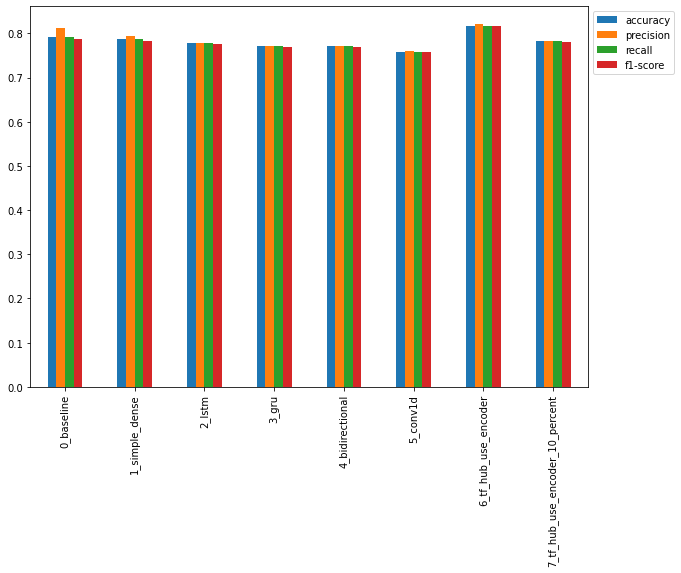

In [ ]:
# Plot and compare all of the model results

all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0, 1.0));

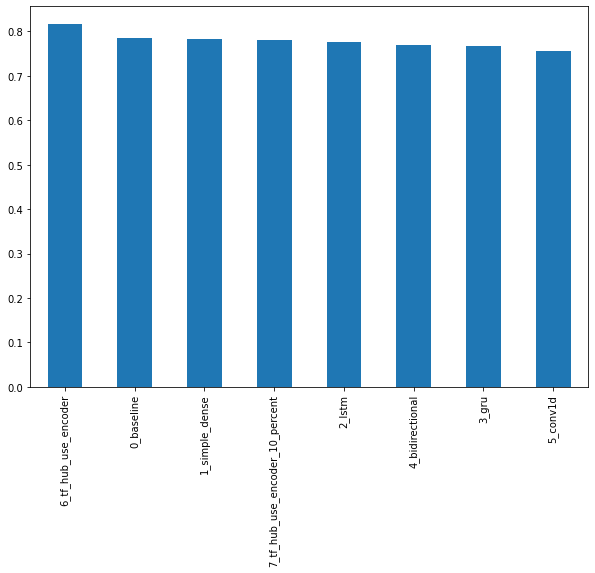

In [ ]:
# Sort model results by f1 score
all_model_results.sort_values("f1-score", ascending=False)["f1-score"].plot(kind="bar", figsize=(10,7));

## Uploading our model training logs to tensorboard.dev
We can further inspect our model's performance using Tensorboard.dev: https://tensorboard.dev

In [ ]:
!tensorboard dev upload --logdir ./model_logs/ \
  --name "NLP Modeling Experiments ZTM TF Course" \
  --description "Comparing multiple different types of model architectures on the Kaggle Tweets Text Classification Dataset" \
  --one_shot # exit uploader once finished uploading


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=U6j3LHmottzFbqpTVVnMTX3CgF8wJX&prompt=consent&access_type=offline

## Saving and loading a model


In [ ]:
# save model to HDF5 format
model_6.save("model_6.h5")

In [ ]:
# Load model with custom hub layer (required HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [ ]:
# how does loaded model perform?

loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 18ms/step - loss: 0.4281 - accuracy: 0.8176


[0.4281293451786041, 0.817585289478302]

## Now let's save to the `savedmodel` format

In [ ]:
# Save f hub model to SavedModel format (default)
model_6.save("model_6_SavedModel_format")

INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


In [ ]:
# load model from SavedModel format
loaded_model_6_SavedModel_format = tf.keras.models.load_model("model_6_SavedModel_format")

In [ ]:
loaded_model_6_SavedModel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 2s 20ms/step - loss: 0.4281 - accuracy: 0.8176


[0.4281293451786041, 0.817585289478302]

## Finding the most wrong examples

* If our best model still isn't perfect, what examples is it getting wrong?
* And of those wrong examples, which ones is it getting most wrong (those will be prediction probabilities closest to th e opposite class)

For example, if a sample should have a label of 0 but our model predicts .99 (really close to 1) or visa versa.

In [ ]:
# Download a pretrained model from google storage
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip

--2022-06-24 18:46:14--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.18.128, 74.125.128.128, 74.125.143.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.18.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  59.1MB/s    in 14s     

2022-06-24 18:46:29 (66.4 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]



In [ ]:
!unzip 08_model_6_USE_feature_extractor.zip

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.index  
  inflating: 08_model_6_USE_feature_extractor/saved_model.pb  


In [ ]:
# Import previously trained model from google storage
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [ ]:
# make predictions with the loaded model from GS
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Create dataframe with validation sentences, validation labels,  and best performing model prediction labels * probs
val_df = pd.DataFrame({
    "text": val_sentences,
    "target": val_labels,
    "pred": model_6_pretrained_preds,
    "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)
})
val_df

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808
...,...,...,...,...
757,That's the ultimate road to destruction,0,0.0,0.137074
758,@SetZorah dad why dont you claim me that mean ...,0,0.0,0.095865
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
760,Crack in the path where I wiped out this morni...,0,1.0,0.612631


In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)

In [ ]:
most_wrong

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
...,...,...,...,...
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043919
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949


In [ ]:
# Check the false positives (model predicted 1, shouldve been 0)
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1.0, Prob: 0.9101957678794861
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1.0, Prob: 0.8769820928573608
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1.0, Prob: 0.8523001074790955
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1.0, Prob: 0.8354544043540955
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1.0, Prob: 0.8272132873535156
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

Target: 0, Pred: 1.0, Prob: 0.814815878868103
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

In [ ]:
# Check the false negatives (model predicted 0, shouldve been 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0.0, Prob: 0.06730346381664276
Text:
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Pred: 0.0, Prob: 0.05507579818367958
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0.0, Prob: 0.054603397846221924
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0.0, Prob: 0.05459698289632797
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0.0, Prob: 0.04963727295398712
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0.0, Prob: 0.04391850158572197
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target: 1, Pred: 0.0, Prob: 0.0

## The speed/score tradeoff

In [ ]:
# Let's make a function to measure the time of prediction
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculuate how long predictons took to make
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [ ]:
# Calculate TF Hub Sentence Encoder time per pred
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model=model_6_pretrained,
                                                            samples=val_sentences)
model_6_total_pred_time, model_6_time_per_pred

(0.2377660959991772, 0.0003120289973742483)

In [ ]:
# Calculate our baseline model times per pred
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.027286720000120113, 3.5809343832178626e-05)

In [ ]:
# Get results for pretrained GS model
model_6_pretrained_results = calculate_results(y_true=val_labels,
                                               y_preds=model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'f1-score': 0.8148082644367335,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651}

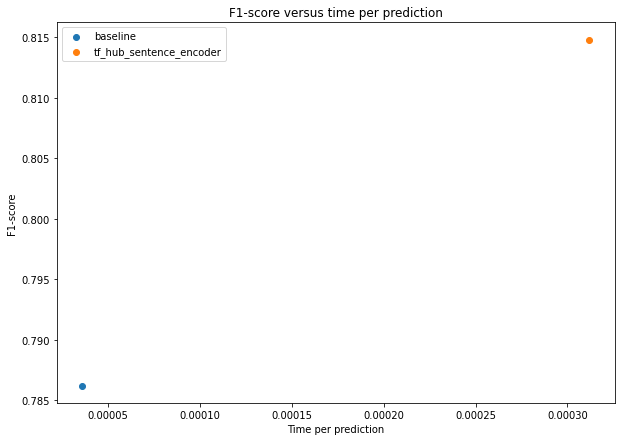

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1-score"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_pretrained_results["f1-score"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-score");

> 📖 **Resource:** See all course materials as well as exercises and extra-curriculum for this notebook on GitHub: https://github.com/mrdbourke/tensorflow-deep-learning